In [1]:
import numpy as np
import pandas as pd

# packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# package for preprocessing
from sklearn import preprocessing

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# 1) Data Loading & First Insights

In [2]:
# load the data
#df = pd.read_pickle('../results/extracted_features_modified.pkl')
df = pd.read_pickle('../results/extracted_features_modified_all_stats.pkl')
df.columns.to_list()

['file',
 'label',
 'speaker',
 'gender',
 'duration',
 'mean',
 'median',
 'max',
 'min',
 'var',
 'std',
 'zcr',
 'energy',
 'energy_avg_change_rate',
 'duration_rising_energy',
 'duration_falling_energy',
 'value_rising_energy',
 'value_falling_energy',
 'rms',
 'log_rms',
 'amplitude',
 'amplitude_avg_change_rate',
 'lpc_global',
 'lpc_local',
 'spectral_entropy',
 'shannon_entropy',
 'threshold_entropy',
 'log_energy_entropy',
 'sure_entropy',
 'f0',
 'voiced',
 'f0_avg_change_rate',
 'pitch',
 'pitch_time',
 'duration_rising_pitch',
 'duration_falling_pitch',
 'value_rising_pitch',
 'value_falling_pitch',
 'speaking_rate',
 'articulation_rate',
 'asd',
 'spectral_centroid',
 'mfccs',
 'delta_mfccs',
 'delta2_mfccs',
 'lpccs_local',
 'lpccs_global',
 'lpcmfccs_global',
 'lpcmfccs_local',
 'lfccs',
 'f1',
 'f1_median',
 'f1_max',
 'f1_mean',
 'f1_std',
 'f1_var',
 'f1_avg_change_rate',
 'f2',
 'f2_median',
 'f2_max',
 'f2_mean',
 'f2_std',
 'f2_var',
 'f2_avg_change_rate',
 'f3',
 

In [3]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 535 entries with 645 columns including the target variable 'label'.


In [4]:
# check for missing values
display(df.isnull().sum())
print("There are {} missing values.".format(df.isnull().sum().sum()))

file                       0
label                      0
speaker                    0
gender                     0
duration                   0
                          ..
value_rising_pitch_iqr     0
value_falling_pitch_iqr    0
skew_log_pitch             0
range_log_pitch            0
range_log_energy           0
Length: 645, dtype: int64

There are 0 missing values.


In [5]:
# look at emotions in target data 
np.unique(df['label'], return_inverse=True)[0]

array(['anger', 'boredom', 'disgust', 'fear', 'happiness', 'neutral',
       'sadness'], dtype=object)

This will also be the order of the LabelEncoder in the next step.

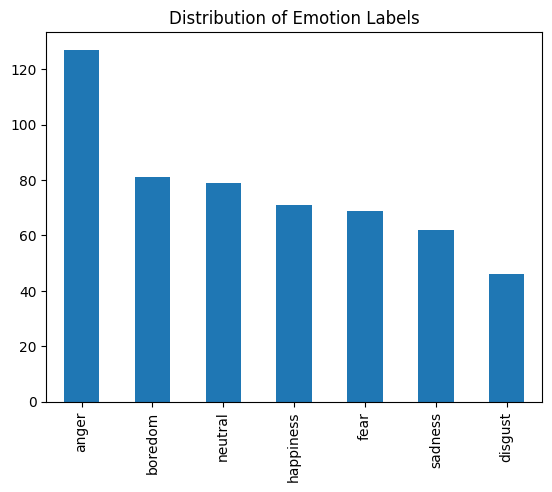

In [6]:
# look at the distribution of the target data
df['label'].value_counts().plot.bar()
plt.title('Distribution of Emotion Labels')
plt.show()

We can see and also know from the description in EmoDB that we have more data of anger whereas the others are slightly balanced. Anyways, we will be using macro-averaged metric calculation which means that we should not have any problem for evaluating the models. 

In [7]:
# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

In [8]:
emo_feat = df.columns.to_list()

# 2) Data Selection & Preprocessing
Choose only features that include single numerical values. Lists or numpy arrays are too complex for these simple models.

In [9]:
# seperate data from target variable
y = df['label']
X = df.drop('label', axis=1)

# choose only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_prep = X.select_dtypes(include=numerics)

# encode the target variable into a numeric value
label_enc = preprocessing.LabelEncoder()
y_prep = pd.DataFrame(label_enc.fit_transform(y), columns=['label'])

# scale numerical features with StandardScaler
scaler = preprocessing.StandardScaler()
X_prep[X_prep.columns] = scaler.fit_transform(X_prep[X_prep.columns]) 

# create and save preprocessed dataset
df_prep = pd.concat([X_prep, y_prep], axis=1)
#df_prep.to_pickle('../results/df_prep_numerical_only.pkl')
df_prep.to_pickle('../results/df_prep_numerical_only_all_stats.pkl')
df_prep.head()

,duration,mean,median,max,min,var,std,speaking_rate,articulation_rate,asd,f1_median,f1_max,f1_mean,f1_std,f1_var,f2_median,f2_max,f2_mean,f2_std,f2_var,f3_median,f3_max,f3_mean,f3_std,f3_var,f4_median,f4_max,f4_mean,f4_std,f4_var,zcr_max,zcr_min,zcr_mean,zcr_median,zcr_var,energy_max,energy_mean,energy_median,energy_var,energy_avg_change_rate_max,energy_avg_change_rate_min,energy_avg_change_rate_mean,energy_avg_change_rate_median,energy_avg_change_rate_var,duration_rising_energy_max,duration_rising_energy_min,duration_rising_energy_mean,duration_rising_energy_median,duration_rising_energy_var,duration_falling_energy_max,duration_falling_energy_min,duration_falling_energy_mean,duration_falling_energy_median,duration_falling_energy_var,value_rising_energy_max,value_rising_energy_min,value_rising_energy_mean,value_rising_energy_median,value_rising_energy_var,value_falling_energy_max,value_falling_energy_min,value_falling_energy_mean,value_falling_energy_median,value_falling_energy_var,rms_max,rms_min,rms_mean,rms_median,rms_var,log_rms_max,log_rms_min,log_rms_mean,log_rms_median,log_rms_var,amplitude_max,amplitude_min,amplitude_mean,amplitude_median,amplitude_var,amplitude_avg_change_rate_max,amplitude_avg_change_rate_min,amplitude_avg_change_rate_mean,amplitude_avg_change_rate_var,lpc_global_max,lpc_global_min,lpc_global_mean,lpc_global_median,lpc_global_var,lpc_local1_max,lpc_local1_min,lpc_local1_mean,lpc_local1_median,lpc_local1_var,lpc_local2_max,lpc_local2_min,lpc_local2_mean,lpc_local2_median,lpc_local2_var,lpc_local3_max,lpc_local3_min,lpc_local3_mean,lpc_local3_median,lpc_local3_var,lpc_local4_max,lpc_local4_min,lpc_local4_mean,lpc_local4_median,lpc_local4_var,spectral_entropy_max,spectral_entropy_min,spectral_entropy_mean,spectral_entropy_median,spectral_entropy_var,shannon_entropy_max,shannon_entropy_mean,shannon_entropy_median,shannon_entropy_var,threshold_entropy_max,threshold_entropy_min,threshold_entropy_mean,threshold_entropy_median,threshold_entropy_var,log_energy_entropy_max,log_energy_entropy_mean,log_energy_entropy_median,log_energy_entropy_var,sure_entropy_max,sure_entropy_mean,sure_entropy_median,sure_entropy_var,f0_max,f0_mean,f0_median,f0_var,voiced_mean,voiced_median,voiced_var,f0_avg_change_rate_max,f0_avg_change_rate_min,f0_avg_change_rate_mean,f0_avg_change_rate_median,f0_avg_change_rate_var,pitch_max,pitch_mean,pitch_median,pitch_var,pitch_time_max,pitch_time_min,pitch_time_mean,pitch_time_median,pitch_time_var,duration_rising_pitch_max,duration_rising_pitch_min,duration_rising_pitch_mean,duration_rising_pitch_median,duration_rising_pitch_var,duration_falling_pitch_max,duration_falling_pitch_min,duration_falling_pitch_mean,duration_falling_pitch_median,duration_falling_pitch_var,value_rising_pitch_max,value_rising_pitch_min,value_rising_pitch_mean,value_rising_pitch_median,value_rising_pitch_var,value_falling_pitch_max,value_falling_pitch_min,value_falling_pitch_mean,value_falling_pitch_median,value_falling_pitch_var,spectral_centroid_max,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_var,mfccs0_max,mfccs0_min,mfccs0_mean,mfccs0_median,mfccs0_var,mfccs1_max,mfccs1_min,mfccs1_mean,mfccs1_median,mfccs1_var,mfccs2_max,mfccs2_min,mfccs2_mean,mfccs2_median,mfccs2_var,mfccs3_max,mfccs3_min,mfccs3_mean,mfccs3_median,mfccs3_var,mfccs4_max,mfccs4_min,mfccs4_mean,mfccs4_median,mfccs4_var,mfccs5_max,mfccs5_min,mfccs5_mean,mfccs5_median,mfccs5_var,mfccs6_max,mfccs6_min,mfccs6_mean,mfccs6_median,mfccs6_var,mfccs7_max,mfccs7_min,mfccs7_mean,mfccs7_median,mfccs7_var,mfccs8_max,mfccs8_min,mfccs8_mean,mfccs8_median,mfccs8_var,mfccs9_max,mfccs9_min,mfccs9_mean,mfccs9_median,mfccs9_var,mfccs10_max,mfccs10_min,mfccs10_mean,mfccs10_median,mfccs10_var,mfccs11_max,mfccs11_min,mfccs11_mean,mfccs11_median,mfccs11_var,mfccs12_max,mfccs12_min,mfccs12_mean,mfccs12_median,mfccs12_var,delta_mfccs0_max,delta_mfccs0_min,delta_mfccs0_mean,delta_mfccs0_median,delta_mfccs0_var,delta_mfccs1_max,delta_mfccs1_min,delta_

### Do the same but with 5 emotions only as in paper 3 (disgust, boredom, sadness, neutral, and happiness)

In [10]:
df_5emos = df[df['label'].isin(['disgust', 'boredom', 'sadness', 'neutral', 'happiness'])].reset_index()
df_5emos.shape

(339, 643)

This is actually also the size they describe in paper 3. 

In [11]:
np.unique(df_5emos['label'], return_inverse=True)[0]

array(['boredom', 'disgust', 'happiness', 'neutral', 'sadness'],
      dtype=object)

In [12]:
# seperate data from target variable
y = df_5emos['label']
X = df_5emos.drop('label', axis=1)

# choose only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_prep = X.select_dtypes(include=numerics)

# encode the target variable into a numeric value
label_enc = preprocessing.LabelEncoder()
y_prep = pd.DataFrame(label_enc.fit_transform(y), columns=['label'])

# scale numerical features with StandardScaler
scaler = preprocessing.StandardScaler()
X_prep[X_prep.columns] = scaler.fit_transform(X_prep[X_prep.columns]) 

# create and save preprocessed dataset
df_prep = pd.concat([X_prep, y_prep], axis=1)
#df_prep.to_pickle('../results/df_prep_5emos_numerical_only.pkl')
df_prep.to_pickle('../results/df_prep_5emos_numerical_only_all_stats.pkl')
df_prep.head()

,index,duration,mean,median,max,min,var,std,speaking_rate,articulation_rate,asd,f1_median,f1_max,f1_mean,f1_std,f1_var,f2_median,f2_max,f2_mean,f2_std,f2_var,f3_median,f3_max,f3_mean,f3_std,f3_var,f4_median,f4_max,f4_mean,f4_std,f4_var,zcr_max,zcr_min,zcr_mean,zcr_median,zcr_var,energy_max,energy_mean,energy_median,energy_var,energy_avg_change_rate_max,energy_avg_change_rate_min,energy_avg_change_rate_mean,energy_avg_change_rate_median,energy_avg_change_rate_var,duration_rising_energy_max,duration_rising_energy_min,duration_rising_energy_mean,duration_rising_energy_median,duration_rising_energy_var,duration_falling_energy_max,duration_falling_energy_min,duration_falling_energy_mean,duration_falling_energy_median,duration_falling_energy_var,value_rising_energy_max,value_rising_energy_min,value_rising_energy_mean,value_rising_energy_median,value_rising_energy_var,value_falling_energy_max,value_falling_energy_min,value_falling_energy_mean,value_falling_energy_median,value_falling_energy_var,rms_max,rms_min,rms_mean,rms_median,rms_var,log_rms_max,log_rms_min,log_rms_mean,log_rms_median,log_rms_var,amplitude_max,amplitude_min,amplitude_mean,amplitude_median,amplitude_var,amplitude_avg_change_rate_max,amplitude_avg_change_rate_min,amplitude_avg_change_rate_mean,amplitude_avg_change_rate_var,lpc_global_max,lpc_global_min,lpc_global_mean,lpc_global_median,lpc_global_var,lpc_local1_max,lpc_local1_min,lpc_local1_mean,lpc_local1_median,lpc_local1_var,lpc_local2_max,lpc_local2_min,lpc_local2_mean,lpc_local2_median,lpc_local2_var,lpc_local3_max,lpc_local3_min,lpc_local3_mean,lpc_local3_median,lpc_local3_var,lpc_local4_max,lpc_local4_min,lpc_local4_mean,lpc_local4_median,lpc_local4_var,spectral_entropy_max,spectral_entropy_min,spectral_entropy_mean,spectral_entropy_median,spectral_entropy_var,shannon_entropy_max,shannon_entropy_mean,shannon_entropy_median,shannon_entropy_var,threshold_entropy_max,threshold_entropy_min,threshold_entropy_mean,threshold_entropy_median,threshold_entropy_var,log_energy_entropy_max,log_energy_entropy_mean,log_energy_entropy_median,log_energy_entropy_var,sure_entropy_max,sure_entropy_mean,sure_entropy_median,sure_entropy_var,f0_max,f0_mean,f0_median,f0_var,voiced_mean,voiced_median,voiced_var,f0_avg_change_rate_max,f0_avg_change_rate_min,f0_avg_change_rate_mean,f0_avg_change_rate_median,f0_avg_change_rate_var,pitch_max,pitch_mean,pitch_median,pitch_var,pitch_time_max,pitch_time_min,pitch_time_mean,pitch_time_median,pitch_time_var,duration_rising_pitch_max,duration_rising_pitch_min,duration_rising_pitch_mean,duration_rising_pitch_median,duration_rising_pitch_var,duration_falling_pitch_max,duration_falling_pitch_min,duration_falling_pitch_mean,duration_falling_pitch_median,duration_falling_pitch_var,value_rising_pitch_max,value_rising_pitch_min,value_rising_pitch_mean,value_rising_pitch_median,value_rising_pitch_var,value_falling_pitch_max,value_falling_pitch_min,value_falling_pitch_mean,value_falling_pitch_median,value_falling_pitch_var,spectral_centroid_max,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_var,mfccs0_max,mfccs0_min,mfccs0_mean,mfccs0_median,mfccs0_var,mfccs1_max,mfccs1_min,mfccs1_mean,mfccs1_median,mfccs1_var,mfccs2_max,mfccs2_min,mfccs2_mean,mfccs2_median,mfccs2_var,mfccs3_max,mfccs3_min,mfccs3_mean,mfccs3_median,mfccs3_var,mfccs4_max,mfccs4_min,mfccs4_mean,mfccs4_median,mfccs4_var,mfccs5_max,mfccs5_min,mfccs5_mean,mfccs5_median,mfccs5_var,mfccs6_max,mfccs6_min,mfccs6_mean,mfccs6_median,mfccs6_var,mfccs7_max,mfccs7_min,mfccs7_mean,mfccs7_median,mfccs7_var,mfccs8_max,mfccs8_min,mfccs8_mean,mfccs8_median,mfccs8_var,mfccs9_max,mfccs9_min,mfccs9_mean,mfccs9_median,mfccs9_var,mfccs10_max,mfccs10_min,mfccs10_mean,mfccs10_median,mfccs10_var,mfccs11_max,mfccs11_min,mfccs11_mean,mfccs11_median,mfccs11_var,mfccs12_max,mfccs12_min,mfccs12_mean,mfccs12_median,mfccs12_var,delta_mfccs0_max,delta_mfccs0_min,delta_mfccs0_mean,delta_mfccs0_median,delta_mfccs0_var,delta_mfccs1_max,delta_mfccs1_min,

# 3) RAVDESS dataset
### Preprocessing Ravdess only

In [78]:
# load the data
df = pd.read_pickle('../results/extracted_features_modified_all_stats_ravdess.pkl')

# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

df.columns.to_list()

['label',
 'duration',
 'mean',
 'median',
 'max',
 'min',
 'var',
 'std',
 'zcr',
 'energy',
 'energy_avg_change_rate',
 'duration_rising_energy',
 'duration_falling_energy',
 'value_rising_energy',
 'value_falling_energy',
 'rms',
 'log_rms',
 'amplitude',
 'amplitude_avg_change_rate',
 'lpc_global',
 'lpc_local',
 'spectral_entropy',
 'shannon_entropy',
 'threshold_entropy',
 'log_energy_entropy',
 'sure_entropy',
 'f0',
 'voiced',
 'f0_avg_change_rate',
 'pitch',
 'pitch_time',
 'duration_rising_pitch',
 'duration_falling_pitch',
 'value_rising_pitch',
 'value_falling_pitch',
 'speaking_rate',
 'articulation_rate',
 'asd',
 'spectral_centroid',
 'mfccs',
 'delta_mfccs',
 'delta2_mfccs',
 'lpccs_local',
 'lpccs_global',
 'lpcmfccs_global',
 'lpcmfccs_local',
 'lfccs',
 'f1',
 'f1_median',
 'f1_max',
 'f1_mean',
 'f1_std',
 'f1_var',
 'f1_avg_change_rate',
 'f2',
 'f2_median',
 'f2_max',
 'f2_mean',
 'f2_std',
 'f2_var',
 'f2_avg_change_rate',
 'f3',
 'f3_median',
 'f3_max',
 'f3_mea

In [79]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 1056 entries with 639 columns including the target variable 'label'.


In [80]:
ravdess_feat = df.columns.to_list()

Since we are removing features that contain only the same value during the modified extraction of features, not all of the features are the same. Nevertheless, when we concatenate the datasets later, we will only work with overlapping features.

In [81]:
def missing_cols(features1, features2):
    missing_1 = list(set(features2) - set(features1))
    missing_2 = list(set(features1) - set(features2))
    return missing_1 + missing_2

In [82]:
missing_emo_rav = missing_cols(emo_feat, ravdess_feat)
missing_emo_rav

['pitch_median', 'f0_avg_change_rate_median', 'threshold_entropy_min']

In [83]:
# check for missing values
display(df.isnull().sum())
print("There are {} missing values.".format(df.isnull().sum().sum()))

label                      0
duration                   0
mean                       0
median                     0
max                        0
                          ..
value_rising_pitch_iqr     0
value_falling_pitch_iqr    0
skew_log_pitch             0
range_log_pitch            0
range_log_energy           0
Length: 639, dtype: int64

There are 0 missing values.


In [84]:
# seperate data from target variable
y = df['label']
X = df.drop('label', axis=1)

# choose only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_prep = X.select_dtypes(include=numerics)

# encode the target variable into a numeric value
label_enc = preprocessing.LabelEncoder()
y_prep = pd.DataFrame(label_enc.fit_transform(y), columns=['label'])

# scale numerical features with StandardScaler
scaler = preprocessing.StandardScaler()
X_prep[X_prep.columns] = scaler.fit_transform(X_prep[X_prep.columns]) 

# create and save preprocessed dataset
df_prep = pd.concat([X_prep, y_prep], axis=1)
df_prep.to_pickle('../results/df_prep_numerical_only_all_stats_ravdess.pkl')
df_prep.head()

,duration,mean,median,max,min,var,std,speaking_rate,articulation_rate,asd,f1_median,f1_max,f1_mean,f1_std,f1_var,f2_median,f2_max,f2_mean,f2_std,f2_var,f3_median,f3_max,f3_mean,f3_std,f3_var,f4_median,f4_max,f4_mean,f4_std,f4_var,zcr_max,zcr_min,zcr_mean,zcr_median,zcr_var,energy_max,energy_mean,energy_median,energy_var,energy_avg_change_rate_max,energy_avg_change_rate_min,energy_avg_change_rate_mean,energy_avg_change_rate_median,energy_avg_change_rate_var,duration_rising_energy_max,duration_rising_energy_min,duration_rising_energy_mean,duration_rising_energy_median,duration_rising_energy_var,duration_falling_energy_max,duration_falling_energy_min,duration_falling_energy_mean,duration_falling_energy_median,duration_falling_energy_var,value_rising_energy_max,value_rising_energy_min,value_rising_energy_mean,value_rising_energy_median,value_rising_energy_var,value_falling_energy_max,value_falling_energy_min,value_falling_energy_mean,value_falling_energy_median,value_falling_energy_var,rms_max,rms_min,rms_mean,rms_median,rms_var,log_rms_max,log_rms_min,log_rms_mean,log_rms_median,log_rms_var,amplitude_max,amplitude_min,amplitude_mean,amplitude_median,amplitude_var,amplitude_avg_change_rate_max,amplitude_avg_change_rate_min,amplitude_avg_change_rate_mean,amplitude_avg_change_rate_var,lpc_global_max,lpc_global_min,lpc_global_mean,lpc_global_median,lpc_global_var,lpc_local1_max,lpc_local1_min,lpc_local1_mean,lpc_local1_median,lpc_local1_var,lpc_local2_max,lpc_local2_min,lpc_local2_mean,lpc_local2_median,lpc_local2_var,lpc_local3_max,lpc_local3_min,lpc_local3_mean,lpc_local3_median,lpc_local3_var,lpc_local4_max,lpc_local4_min,lpc_local4_mean,lpc_local4_median,lpc_local4_var,spectral_entropy_max,spectral_entropy_min,spectral_entropy_mean,spectral_entropy_median,spectral_entropy_var,shannon_entropy_max,shannon_entropy_mean,shannon_entropy_median,shannon_entropy_var,threshold_entropy_max,threshold_entropy_mean,threshold_entropy_median,threshold_entropy_var,log_energy_entropy_max,log_energy_entropy_mean,log_energy_entropy_median,log_energy_entropy_var,sure_entropy_max,sure_entropy_mean,sure_entropy_median,sure_entropy_var,f0_max,f0_mean,f0_median,f0_var,voiced_mean,voiced_median,voiced_var,f0_avg_change_rate_max,f0_avg_change_rate_min,f0_avg_change_rate_mean,f0_avg_change_rate_var,pitch_max,pitch_mean,pitch_var,pitch_time_max,pitch_time_min,pitch_time_mean,pitch_time_median,pitch_time_var,duration_rising_pitch_max,duration_rising_pitch_min,duration_rising_pitch_mean,duration_rising_pitch_median,duration_rising_pitch_var,duration_falling_pitch_max,duration_falling_pitch_min,duration_falling_pitch_mean,duration_falling_pitch_median,duration_falling_pitch_var,value_rising_pitch_max,value_rising_pitch_min,value_rising_pitch_mean,value_rising_pitch_median,value_rising_pitch_var,value_falling_pitch_max,value_falling_pitch_min,value_falling_pitch_mean,value_falling_pitch_median,value_falling_pitch_var,spectral_centroid_max,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_var,mfccs0_max,mfccs0_min,mfccs0_mean,mfccs0_median,mfccs0_var,mfccs1_max,mfccs1_min,mfccs1_mean,mfccs1_median,mfccs1_var,mfccs2_max,mfccs2_min,mfccs2_mean,mfccs2_median,mfccs2_var,mfccs3_max,mfccs3_min,mfccs3_mean,mfccs3_median,mfccs3_var,mfccs4_max,mfccs4_min,mfccs4_mean,mfccs4_median,mfccs4_var,mfccs5_max,mfccs5_min,mfccs5_mean,mfccs5_median,mfccs5_var,mfccs6_max,mfccs6_min,mfccs6_mean,mfccs6_median,mfccs6_var,mfccs7_max,mfccs7_min,mfccs7_mean,mfccs7_median,mfccs7_var,mfccs8_max,mfccs8_min,mfccs8_mean,mfccs8_median,mfccs8_var,mfccs9_max,mfccs9_min,mfccs9_mean,mfccs9_median,mfccs9_var,mfccs10_max,mfccs10_min,mfccs10_mean,mfccs10_median,mfccs10_var,mfccs11_max,mfccs11_min,mfccs11_mean,mfccs11_median,mfccs11_var,mfccs12_max,mfccs12_min,mfccs12_mean,mfccs12_median,mfccs12_var,delta_mfccs0_max,delta_mfccs0_min,delta_mfccs0_mean,delta_mfccs0_median,delta_mfccs0_var,delta_mfccs1_max,delta_mfccs1_min,delta_mfccs1_mean,delta_mfccs1_median,delta_mfccs1_var,delta_mfccs2

In [85]:
# check for missing values
print("There are {} missing values.".format(df_prep.isnull().sum().sum()))

There are 13728 missing values.


Since there are really huge numbers in some features, we get some inf values after feature scaling. The models are not able to work with these. Moreover, models face issues where there is a huge standard deviation in a feature, i.e. std = inf. We therefore want to remove all features that may face issues with large values from the feature set. 

In [86]:
# find the features that are not useful anymore
nans = np.where(df_prep.isnull())
nan_cols = list(set(list(nans[1])))

# find the feature names with the indices
cols = df_prep.columns.to_list()
nan_col_names = [cols[i] for i in nan_cols]
nan_col_names

['lpcmfccs_local8_var',
 'lpcmfccs_local2_var',
 'lpccs_local10_var',
 'lpcmfccs_local9_var',
 'lpcmfccs_local3_var',
 'lpccs_local11_var',
 'lpcmfccs_local10_var',
 'lpcmfccs_local4_var',
 'lpcmfccs_local11_var',
 'lpcmfccs_local5_var',
 'lpcmfccs_local6_var',
 'lpcmfccs_local0_var',
 'lpcmfccs_local7_var']

In [87]:
df_desc = df_prep.describe()
df_desc

,duration,mean,median,max,min,var,std,speaking_rate,articulation_rate,asd,f1_median,f1_max,f1_mean,f1_std,f1_var,f2_median,f2_max,f2_mean,f2_std,f2_var,f3_median,f3_max,f3_mean,f3_std,f3_var,f4_median,f4_max,f4_mean,f4_std,f4_var,zcr_max,zcr_min,zcr_mean,zcr_median,zcr_var,energy_max,energy_mean,energy_median,energy_var,energy_avg_change_rate_max,energy_avg_change_rate_min,energy_avg_change_rate_mean,energy_avg_change_rate_median,energy_avg_change_rate_var,duration_rising_energy_max,duration_rising_energy_min,duration_rising_energy_mean,duration_rising_energy_median,duration_rising_energy_var,duration_falling_energy_max,duration_falling_energy_min,duration_falling_energy_mean,duration_falling_energy_median,duration_falling_energy_var,value_rising_energy_max,value_rising_energy_min,value_rising_energy_mean,value_rising_energy_median,value_rising_energy_var,value_falling_energy_max,value_falling_energy_min,value_falling_energy_mean,value_falling_energy_median,value_falling_energy_var,rms_max,rms_min,rms_mean,rms_median,rms_var,log_rms_max,log_rms_min,log_rms_mean,log_rms_median,log_rms_var,amplitude_max,amplitude_min,amplitude_mean,amplitude_median,amplitude_var,amplitude_avg_change_rate_max,amplitude_avg_change_rate_min,amplitude_avg_change_rate_mean,amplitude_avg_change_rate_var,lpc_global_max,lpc_global_min,lpc_global_mean,lpc_global_median,lpc_global_var,lpc_local1_max,lpc_local1_min,lpc_local1_mean,lpc_local1_median,lpc_local1_var,lpc_local2_max,lpc_local2_min,lpc_local2_mean,lpc_local2_median,lpc_local2_var,lpc_local3_max,lpc_local3_min,lpc_local3_mean,lpc_local3_median,lpc_local3_var,lpc_local4_max,lpc_local4_min,lpc_local4_mean,lpc_local4_median,lpc_local4_var,spectral_entropy_max,spectral_entropy_min,spectral_entropy_mean,spectral_entropy_median,spectral_entropy_var,shannon_entropy_max,shannon_entropy_mean,shannon_entropy_median,shannon_entropy_var,threshold_entropy_max,threshold_entropy_mean,threshold_entropy_median,threshold_entropy_var,log_energy_entropy_max,log_energy_entropy_mean,log_energy_entropy_median,log_energy_entropy_var,sure_entropy_max,sure_entropy_mean,sure_entropy_median,sure_entropy_var,f0_max,f0_mean,f0_median,f0_var,voiced_mean,voiced_median,voiced_var,f0_avg_change_rate_max,f0_avg_change_rate_min,f0_avg_change_rate_mean,f0_avg_change_rate_var,pitch_max,pitch_mean,pitch_var,pitch_time_max,pitch_time_min,pitch_time_mean,pitch_time_median,pitch_time_var,duration_rising_pitch_max,duration_rising_pitch_min,duration_rising_pitch_mean,duration_rising_pitch_median,duration_rising_pitch_var,duration_falling_pitch_max,duration_falling_pitch_min,duration_falling_pitch_mean,duration_falling_pitch_median,duration_falling_pitch_var,value_rising_pitch_max,value_rising_pitch_min,value_rising_pitch_mean,value_rising_pitch_median,value_rising_pitch_var,value_falling_pitch_max,value_falling_pitch_min,value_falling_pitch_mean,value_falling_pitch_median,value_falling_pitch_var,spectral_centroid_max,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_var,mfccs0_max,mfccs0_min,mfccs0_mean,mfccs0_median,mfccs0_var,mfccs1_max,mfccs1_min,mfccs1_mean,mfccs1_median,mfccs1_var,mfccs2_max,mfccs2_min,mfccs2_mean,mfccs2_median,mfccs2_var,mfccs3_max,mfccs3_min,mfccs3_mean,mfccs3_median,mfccs3_var,mfccs4_max,mfccs4_min,mfccs4_mean,mfccs4_median,mfccs4_var,mfccs5_max,mfccs5_min,mfccs5_mean,mfccs5_median,mfccs5_var,mfccs6_max,mfccs6_min,mfccs6_mean,mfccs6_median,mfccs6_var,mfccs7_max,mfccs7_min,mfccs7_mean,mfccs7_median,mfccs7_var,mfccs8_max,mfccs8_min,mfccs8_mean,mfccs8_median,mfccs8_var,mfccs9_max,mfccs9_min,mfccs9_mean,mfccs9_median,mfccs9_var,mfccs10_max,mfccs10_min,mfccs10_mean,mfccs10_median,mfccs10_var,mfccs11_max,mfccs11_min,mfccs11_mean,mfccs11_median,mfccs11_var,mfccs12_max,mfccs12_min,mfccs12_mean,mfccs12_median,mfccs12_var,delta_mfccs0_max,delta_mfccs0_min,delta_mfccs0_mean,delta_mfccs0_median,delta_mfccs0_var,delta_mfccs1_max,delta_mfccs1_min,delta_mfccs1_mean,delta_mfccs1_median,delta_mfccs1_var,delta_mfccs2

In [88]:
df_desc_nans = list(np.where(df_desc.loc['std'] == np.inf)[0])
cols = df_prep.columns.to_list()
nan_col_names.extend([cols[i] for i in df_desc_nans])
nan_col_names

['lpcmfccs_local8_var',
 'lpcmfccs_local2_var',
 'lpccs_local10_var',
 'lpcmfccs_local9_var',
 'lpcmfccs_local3_var',
 'lpccs_local11_var',
 'lpcmfccs_local10_var',
 'lpcmfccs_local4_var',
 'lpcmfccs_local11_var',
 'lpcmfccs_local5_var',
 'lpcmfccs_local6_var',
 'lpcmfccs_local0_var',
 'lpcmfccs_local7_var',
 'lpccs_local9_var',
 'lpcmfccs_local1_var']

In [89]:
# drop these features and save the dataframe
df_prep.drop(columns = nan_col_names, inplace=True)

In [90]:
# check for missing values
print("There are {} missing values.".format(df_prep.isnull().sum().sum()))

There are 0 missing values.


In [91]:
# save the dataframe
df_prep.to_pickle('../results/df_prep_numerical_only_all_stats_ravdess.pkl')

### Preprocessing EmoDB + Ravdess

In [92]:
# load the data
df_emodb = pd.read_pickle('../results/extracted_features_modified_all_stats.pkl')
df_ravdess = pd.read_pickle('../results/extracted_features_modified_all_stats_ravdess.pkl')

# concatenate both datasets
df = pd.concat([df_emodb, df_ravdess], axis=0)
df.drop(columns = missing_emo_rav, inplace=True)
df = df.reset_index(drop=True)

# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

In [93]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 1591 entries with 639 columns including the target variable 'label'.


In [94]:
# seperate data from target variable
y = df['label']
X = df.drop('label', axis=1)

# choose only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_prep = X.select_dtypes(include=numerics)

# encode the target variable into a numeric value
label_enc = preprocessing.LabelEncoder()
y_prep = pd.DataFrame(label_enc.fit_transform(y), columns=['label'])

# scale numerical features with StandardScaler
scaler = preprocessing.StandardScaler()
X_prep[X_prep.columns] = scaler.fit_transform(X_prep[X_prep.columns]) 

# create and save preprocessed dataset
df_prep = pd.concat([X_prep, y_prep], axis=1)
df_prep.to_pickle('../results/df_prep_numerical_only_all_stats_emodb_ravdess.pkl')
df_prep.head()

,duration,mean,median,max,min,var,std,speaking_rate,articulation_rate,asd,f1_median,f1_max,f1_mean,f1_std,f1_var,f2_median,f2_max,f2_mean,f2_std,f2_var,f3_median,f3_max,f3_mean,f3_std,f3_var,f4_median,f4_max,f4_mean,f4_std,f4_var,zcr_max,zcr_min,zcr_mean,zcr_median,zcr_var,energy_max,energy_mean,energy_median,energy_var,energy_avg_change_rate_max,energy_avg_change_rate_min,energy_avg_change_rate_mean,energy_avg_change_rate_median,energy_avg_change_rate_var,duration_rising_energy_max,duration_rising_energy_min,duration_rising_energy_mean,duration_rising_energy_median,duration_rising_energy_var,duration_falling_energy_max,duration_falling_energy_min,duration_falling_energy_mean,duration_falling_energy_median,duration_falling_energy_var,value_rising_energy_max,value_rising_energy_min,value_rising_energy_mean,value_rising_energy_median,value_rising_energy_var,value_falling_energy_max,value_falling_energy_min,value_falling_energy_mean,value_falling_energy_median,value_falling_energy_var,rms_max,rms_min,rms_mean,rms_median,rms_var,log_rms_max,log_rms_min,log_rms_mean,log_rms_median,log_rms_var,amplitude_max,amplitude_min,amplitude_mean,amplitude_median,amplitude_var,amplitude_avg_change_rate_max,amplitude_avg_change_rate_min,amplitude_avg_change_rate_mean,amplitude_avg_change_rate_var,lpc_global_max,lpc_global_min,lpc_global_mean,lpc_global_median,lpc_global_var,lpc_local1_max,lpc_local1_min,lpc_local1_mean,lpc_local1_median,lpc_local1_var,lpc_local2_max,lpc_local2_min,lpc_local2_mean,lpc_local2_median,lpc_local2_var,lpc_local3_max,lpc_local3_min,lpc_local3_mean,lpc_local3_median,lpc_local3_var,lpc_local4_max,lpc_local4_min,lpc_local4_mean,lpc_local4_median,lpc_local4_var,spectral_entropy_max,spectral_entropy_min,spectral_entropy_mean,spectral_entropy_median,spectral_entropy_var,shannon_entropy_max,shannon_entropy_mean,shannon_entropy_median,shannon_entropy_var,threshold_entropy_max,threshold_entropy_mean,threshold_entropy_median,threshold_entropy_var,log_energy_entropy_max,log_energy_entropy_mean,log_energy_entropy_median,log_energy_entropy_var,sure_entropy_max,sure_entropy_mean,sure_entropy_median,sure_entropy_var,f0_max,f0_mean,f0_median,f0_var,voiced_mean,voiced_median,voiced_var,f0_avg_change_rate_max,f0_avg_change_rate_min,f0_avg_change_rate_mean,f0_avg_change_rate_var,pitch_max,pitch_mean,pitch_var,pitch_time_max,pitch_time_min,pitch_time_mean,pitch_time_median,pitch_time_var,duration_rising_pitch_max,duration_rising_pitch_min,duration_rising_pitch_mean,duration_rising_pitch_median,duration_rising_pitch_var,duration_falling_pitch_max,duration_falling_pitch_min,duration_falling_pitch_mean,duration_falling_pitch_median,duration_falling_pitch_var,value_rising_pitch_max,value_rising_pitch_min,value_rising_pitch_mean,value_rising_pitch_median,value_rising_pitch_var,value_falling_pitch_max,value_falling_pitch_min,value_falling_pitch_mean,value_falling_pitch_median,value_falling_pitch_var,spectral_centroid_max,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_var,mfccs0_max,mfccs0_min,mfccs0_mean,mfccs0_median,mfccs0_var,mfccs1_max,mfccs1_min,mfccs1_mean,mfccs1_median,mfccs1_var,mfccs2_max,mfccs2_min,mfccs2_mean,mfccs2_median,mfccs2_var,mfccs3_max,mfccs3_min,mfccs3_mean,mfccs3_median,mfccs3_var,mfccs4_max,mfccs4_min,mfccs4_mean,mfccs4_median,mfccs4_var,mfccs5_max,mfccs5_min,mfccs5_mean,mfccs5_median,mfccs5_var,mfccs6_max,mfccs6_min,mfccs6_mean,mfccs6_median,mfccs6_var,mfccs7_max,mfccs7_min,mfccs7_mean,mfccs7_median,mfccs7_var,mfccs8_max,mfccs8_min,mfccs8_mean,mfccs8_median,mfccs8_var,mfccs9_max,mfccs9_min,mfccs9_mean,mfccs9_median,mfccs9_var,mfccs10_max,mfccs10_min,mfccs10_mean,mfccs10_median,mfccs10_var,mfccs11_max,mfccs11_min,mfccs11_mean,mfccs11_median,mfccs11_var,mfccs12_max,mfccs12_min,mfccs12_mean,mfccs12_median,mfccs12_var,delta_mfccs0_max,delta_mfccs0_min,delta_mfccs0_mean,delta_mfccs0_median,delta_mfccs0_var,delta_mfccs1_max,delta_mfccs1_min,delta_mfccs1_mean,delta_mfccs1_median,delta_mfccs1_var,delta_mfccs2

Also here we have to check for possible nan and inf values after feature scaling since it might be that the numbers were to big. 

In [95]:
# check for missing values
print("There are {} missing values.".format(df_prep.isnull().sum().sum()))

There are 20683 missing values.


In [96]:
# find the features that are not useful anymore
nans = np.where(df_prep.isnull())
nan_cols = list(set(list(nans[1])))

# find the feature names with the indices
cols = df_prep.columns.to_list()
nan_col_names = [cols[i] for i in nan_cols]
nan_col_names

['lpcmfccs_local8_var',
 'lpccs_local10_var',
 'lpcmfccs_local9_var',
 'lpcmfccs_local3_var',
 'lpccs_local11_var',
 'lpcmfccs_local10_var',
 'lpcmfccs_local4_var',
 'lpcmfccs_local11_var',
 'lpcmfccs_local5_var',
 'lpcmfccs_local6_var',
 'lpcmfccs_local0_var',
 'lpcmfccs_local7_var',
 'lpcmfccs_local1_var']

In [97]:
df_desc = df_prep.describe()

In [98]:
df_desc_nans = list(np.where(df_desc.loc['std'] == np.inf)[0])
cols = df_prep.columns.to_list()
nan_col_names.extend([cols[i] for i in df_desc_nans])
nan_col_names

['lpcmfccs_local8_var',
 'lpccs_local10_var',
 'lpcmfccs_local9_var',
 'lpcmfccs_local3_var',
 'lpccs_local11_var',
 'lpcmfccs_local10_var',
 'lpcmfccs_local4_var',
 'lpcmfccs_local11_var',
 'lpcmfccs_local5_var',
 'lpcmfccs_local6_var',
 'lpcmfccs_local0_var',
 'lpcmfccs_local7_var',
 'lpcmfccs_local1_var',
 'lpccs_local9_var',
 'lpcmfccs_local2_var']

In [99]:
# drop these features and save the dataframe
df_prep.drop(columns = nan_col_names, inplace=True)

In [100]:
# check for missing values
print("There are {} missing values.".format(df_prep.isnull().sum().sum()))

There are 0 missing values.


In [101]:
df_prep.to_pickle('../results/df_prep_numerical_only_all_stats_emodb_ravdess.pkl')